In [1]:
! pip install --quiet -r requirements.txt

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vitor\AppData\Local\Temp\ipykernel_15072\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("./../data/2- participacao-despejo-residuo-plastico.csv")

In [4]:
df.head()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entidade                                                   170 non-null    object 
 1   Código                                                     159 non-null    object 
 2   Ano                                                        170 non-null    int64  
 3   Participação na emissão global de plásticos para o oceano  170 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB


In [6]:
df.isnull().sum()

Entidade                                                      0
Código                                                       11
Ano                                                           0
Participação na emissão global de plásticos para o oceano     0
dtype: int64

In [7]:
df = df.dropna()

In [9]:
df.isnull().sum()

Entidade                                                     0
Código                                                       0
Ano                                                          0
Participação na emissão global de plásticos para o oceano    0
dtype: int64

In [10]:
df.describe()

,Ano,Participação na emissão global de plásticos para o oceano
count,159.0,159.000000
mean,2019.0,0.628688
std,0.0,3.198614
min,2019.0,0.000000
25%,2019.0,0.000919
50%,2019.0,0.023993
75%,2019.0,0.163560
max,2019.0,36.384511


In [12]:
emissao = df.groupby('Entidade')['Participação na emissão global de plásticos para o oceano'].sum().sort_values(ascending=False)

paises_do_top10 = emissao.head(10)

print("Top 10 Países com Maiores Emissões de Plástico para o Oceano (ano de 2019):")

for pais, value in paises_do_top10.items():
    print(f"{pais}: {value:.6f}")


Top 10 Países com Maiores Emissões de Plástico para o Oceano (ano de 2019):
Philippines: 36.384511
India: 12.916633
Malaysia: 7.463107
China: 7.218993
Indonesia: 5.751446
Brazil: 3.859175
Vietnam: 2.881287
Bangladesh: 2.515677
Thailand: 2.328431
Nigeria: 1.903093


C:\Users\vitor\AppData\Local\Temp\ipykernel_15072\3273549340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paises_do_top10.values, y=paises_do_top10.index, palette="coolwarm")


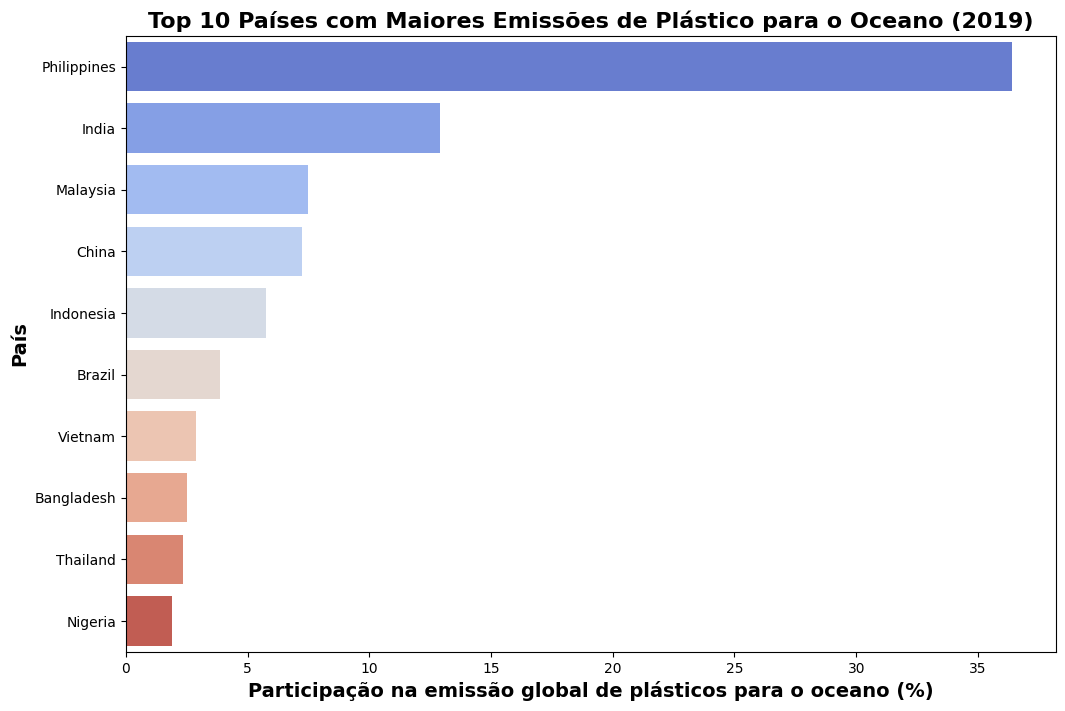

In [15]:
plt.figure(figsize=(12, 8))

sns.barplot(x=paises_do_top10.values, y=paises_do_top10.index, palette="coolwarm")

plt.xlabel('Participação na emissão global de plásticos para o oceano (%)', fontsize=14, weight='bold')
plt.ylabel('País',  fontsize=14, weight='bold')
plt.title('Top 10 Países com Maiores Emissões de Plástico para o Oceano (2019)', fontsize=16, weight='bold')

plt.show()